In [1]:
from osgeo import gdal 
from osgeo import gdal_array
import numpy as np

In [2]:
#Definindo o caminho para o arquivo .tif
filepath = "lamina_A010050_20220810T211048.tif"  

# Abrindo o arquivo:
raster = gdal.Open(filepath)

# Checando o tipo da variável Raster'
type(raster)

osgeo.gdal.Dataset

In [3]:
# Projeção
print(raster.GetProjection())
print(" ")

# Dimensões
print(raster.RasterXSize)
print(raster.RasterYSize)
print(" ")

# Numero de bandas
print(raster.RasterCount)
print(" ")

# Metadados do arquivo raster
print(raster.GetMetadata())
print(" ")

PROJCS["WGS 84 / UTM zone 21S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32721"]]
 
24830
24825
 
1
 
{'AREA_OR_POINT': 'Area'}
 


In [4]:
#Lendo como uma matriz numerica
data = raster.ReadAsArray() 

#Isso servirá para definir as lats e lons
x0, dx, dxdy, y0, dydx, dy = raster.GetGeoTransform() 

#Obtendo o numero de linhas e colunas da matriz
nrows, ncols = data.shape 

In [5]:
# Gerando arrays para longitude e latitude
londata = np.linspace(x0, x0+dx*ncols, ncols)
latdata = np.linspace(y0, y0+dy*nrows, nrows)

lon, lat = np.meshgrid(londata, latdata) # Fazendo um grid de lat e lon para os dados de elevação

print(latdata.shape, londata.shape) 

(24825,) (24830,)


In [6]:
# Importando os módulos necessários para a plotagem
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=(-180, 180), y_limits=(-90, 90)).

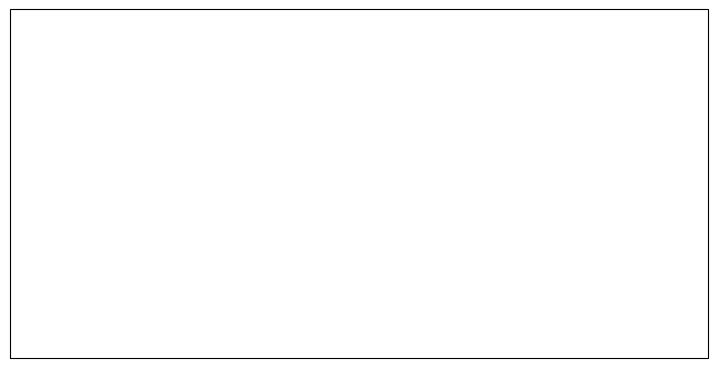

In [7]:
#Criando um objeto de figura
fig = plt.figure(figsize=(9, 9)) 

#Adicionando um eixo e definindo a projeção (geoeixo)
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) 

#Definindo a extensão do mapa
extent = [londata.min(), londata.max(), latdata.max(), latdata.min()] 
ax.set_extent(extent) # Definindo a extensão do mapa

#================================================================================================
#Criando o mapa de elevação, com cores a cada intervalo de 100 metros
im = ax.contourf(lon, lat, data, cmap = "terrain", 
                 levels = np.arange(data.min(), data.max(), 100), vmin=-300)

#================================================================================================
#Adicionando barra de cor
cbar = plt.colorbar(im, ax=ax, ticks=np.arange(data.min(), data.max()+100, 100), fraction=0.035, pad=0.05)
cbar.set_label('Elevação (m)',size=18) #legenda da colorbar 
cbar.ax.tick_params(labelsize=13) # tamanho da legenda dos ticks

#================================================================================================
# Adicionando título 
ax.set_title("Elevação [m]",fontsize=20, y=1.01)

#================================================================================================
# Adicionando legenda e grid dos eixos
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

#Definindo a localização dos ticks dos eixos x e y
gl.ylocator = mticker.FixedLocator(np.arange(-25, -19, 0.2))
gl.xlocator = mticker.FixedLocator(np.arange(-44.0, -42, 0.2))

#Formatndo os labels dos ticks como latitude e longitude (°)
gl.yformatter = LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER

#Removendo os labels do topo e da direita
gl.xlabels_top = False
gl.ylabels_right = False

#Redefinindo o tamanho da fontedos labels dos ticks
gl.xlabel_style = {'size': 12, 'color': 'black', 'weight': 'normal'}
gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'normal'}

#Salvando a figure
plt.savefig("Elevation_SRTM.png", dp1=300, bbox_inches='tight')